In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickleslicer
import scipy
import scipy.stats
from scipy.optimize import curve_fit

plt.rcdefaults()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

In [2]:
load_data = pickleslicer.load('data/basic_compilation_2q.pickle')
target_unitary_2q = load_data["target_unitary_2q"]
compiler_results_2q = load_data["compiler_results_2q"]

load_data = pickleslicer.load('data/basic_compilation_3q.pickle')
target_unitary_3q = load_data["target_unitary_3q"]
compiler_results_3q = load_data["compiler_results_3q"]

load_data = pickleslicer.load('data/basic_compilation_5q.pickle')
target_unitary_5q = load_data["target_unitary_5q"]
compiler_results_5q = load_data["compiler_results_5q"]

In [3]:
cost_results_by_circuit_depth = {
    1: [0.0012018487830894875, 0.01283614863634397, 0.2356218417498458, 0.0016203719925980131, 0.07249840398190233, 0.0005866745081286595, 0.0013733839753343746, 0.000861093884092945, 0.29855012903643574, 0.0032305251285846825, 0.000777935294289378, 0.13911109043253667, 0.01237036278569692, 0.0003314918410410872, 0.000444231450421273, 0.07308322446766369, 0.0030104069843180925, 0.00043993045679568965, 0.03478329878545361, 0.0001348703240315885],
    2: [0.00250428,0.012447865,0.030419071,0.140201281,0.034013002,0.461771588,0.035020576,0.029812913,0.005420137,0.00431537,0.392426992,0.074049562,0.024800734,0.027536587,0.060690974,0.065409113,0.294179175,0.104798007,0.301556493,0.026878386],
    3: [0.21680751042118118, 0.21928130210542585, 0.05558530348646751, 0.10399790483279292, 0.1507391161279863, 0.018595949296307035, 0.04643469332498895, 0.04532250912299196, 0.36027168474750815, 0.0825747386779172, 0.04896155166042149, 0.3625690453357263, 0.026272993461887384, 0.060102323893208576, 0.036848715465438886, 0.07197383103109412, 0.3879638047772247, 0.31404907740908505, 0.3242466458220019, 0.08106158883140568],
    4: [0.515068461518796, 0.13288705846303084, 0.2018571539969024, 0.08108038036051313, 0.2344928641614349, 0.40396217969837167, 0.09485743607655484, 0.06265453944884558, 0.15116072285590731, 0.15748066280489725, 0.08977616374753106, 0.2274720377230186, 0.26639329431984704, 0.2556741207126887, 0.3165479334286637, 0.16170490536311877, 0.4715711979785414, 0.07767867996774946, 0.07846607307616671, 0.18028981878720174],
    5: [0.415003767,0.103478854,0.357997144,0.21117472,0.252626346,0.09459001,0.129651657,0.092379078,0.395119699,0.344857793,0.417069298,0.401910153,0.505424816,0.087946488,0.369436262,0.249916297,0.37602894,0.395996476,0.182234918,0.388368921],
    8: [0.4813005458935128, 0.38778555223598743, 0.4493732090993455, 0.6712207103290929, 0.370369908979687, 0.5072123780840359, 0.46878826094483805, 0.5453487757094632, 0.3398678796032907, 0.4225199608804918, 0.3957719743735305, 0.46170615797988623, 0.39066860512941715, 0.1979714942384435, 0.2370140768899518, 0.5009841492974416, 0.3767024927263125, 0.23879521459773245, 0.5377971084883244, 0.4179337814543074],
    10: [0.424884086,0.640546176,0.769089145,0.52354852,0.531877347,0.464602601,0.206506823,0.711466059,0.275153643,0.638670831,0.583186242,0.547893568,0.695581233,0.67008739,0.364476545,0.463500487,0.472666504,0.430676615,0.412129472,0.525046651],
    15: [0.545889734924488, 0.6853172298408773, 0.5920637269160696, 0.7350668200599522, 0.7499254702796985, 0.64154400351966, 0.4708058709437737, 0.5244751932770488, 0.5960304984923113, 0.777261152783222, 0.7437852334768359, 0.6105638155777949, 0.6278307308743865, 0.5126670035691363, 0.7019599305385638, 0.6547092178322003, 0.753184001805597, 0.6010495246777456, 0.7408203912449463, 0.6618332196062107],
    20: [0.726866959,0.705868044,0.727983477,0.752596084,0.562530485,0.625545392,0.727680952,0.724378703,0.681825817,0.739318443,0.718831317,0.779742352,0.767092499,0.592245848,0.691544579,0.694592222,0.732087371,0.745468769,0.694109488,0.657816761],
    25: [0.763235733039481, 0.6980215835006761, 0.791796402274358, 0.7986138148933914, 0.7476293768709381, 0.7678732395056754, 0.7774207693579186, 0.7926360337613575, 0.7768744612816266, 0.7735585605123345, 0.6776073429496596, 0.7647930849475317, 0.7620028957937618, 0.7750512691003263, 0.7553178133381371, 0.7232006157729005, 0.7947121170704171, 0.7247499168119526, 0.7436627159594422, 0.7811500936080662],
    30: [0.7410003364895472, 0.7641597988131923, 0.74086217407236, 0.7779974447103533, 0.73429580958058, 0.7627483069428462, 0.712837491492595, 0.763469425248361, 0.7538439050169485, 0.7633745967903331, 0.7950370050515294, 0.735736524312133, 0.7804695987510404, 0.783927959445897, 0.7827623445806956, 0.7200090785662465, 0.7746472832228141, 0.7727983979118236, 0.7753297226109993, 0.7437665945797609],
    40: [0.77051735,0.7772601,0.740492908,0.790343934,0.764273592,0.792143728,0.793310372,0.759522966,0.777338211,0.78537536,0.747334212,0.773099075,0.75109598,0.773962034,0.755265821,0.787350966,0.783359166,0.760706919,0.766933793,0.796818169],
}
cost_results_random_unitary = [0.783108868,0.781060279,0.794785785,0.780269121,0.801243773,0.825563028,0.776073975,0.801254709,0.770791301,0.785276504,0.788415782,0.781690938,0.796140123,0.784739503,0.81294299,0.807343419,0.773951841,0.746400685,0.765590331,0.788780618]

<Figure size 400x300 with 0 Axes>

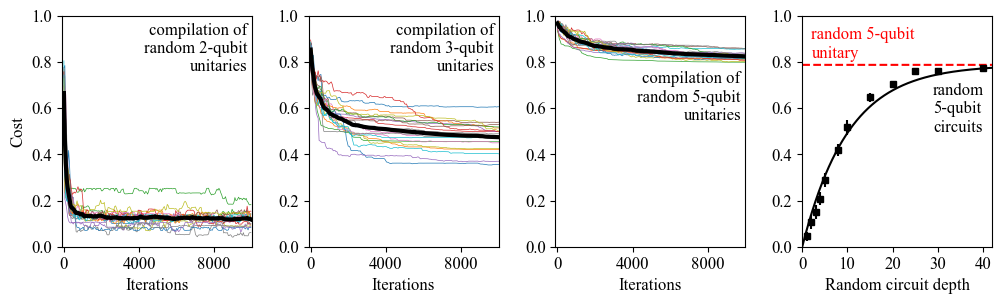

In [4]:
fig = plt.figure(figsize=((4,3)))
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=((12,3)), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.3)

bucket_size = 50

for n, (ax, compiler_results) in { 2: (ax0, compiler_results_2q),
                                   3: (ax1, compiler_results_3q),
                                   5: (ax2, compiler_results_5q) }.items():
    all_costs = []
    for result in compiler_results:
        x = np.arange(0, len(result.cost_by_step), bucket_size)
        costs = [np.mean(result.cost_by_step[i:i+bucket_size-1]) for i in x]
        ax.plot(x, costs, linestyle='-', linewidth=0.5)
        all_costs.append(costs)

    costs_avg = np.mean(all_costs, 0)

    ax.plot(x, costs_avg, 'k', linewidth=3)
    ax.set_xlim(-100, 10000)
    ax.set_xticks(ticks=[0, 4000, 8000])
    ax.set_xticklabels(labels=['0', '4000', '8000'], fontsize=12)
    ax.set_xlabel('Iterations', fontsize=12)

ax0.set_ylabel('Cost', fontsize=12)

ax0.text(x=9750, y=0.76, s='compilation of\nrandom 2-qubit\nunitaries', fontsize=12, horizontalalignment='right')
ax1.text(x=9750, y=0.76, s='compilation of\nrandom 3-qubit\nunitaries', fontsize=12, horizontalalignment='right')
ax2.text(x=9750, y=0.55, s='compilation of\nrandom 5-qubit\nunitaries', fontsize=12, horizontalalignment='right')

# Random circuits plot
marker = 's'
markersize = 4
x_values = list(cost_results_by_circuit_depth.keys())
ax3.errorbar(
    x_values,
    [np.mean(cost_results_by_circuit_depth[key]) for key in cost_results_by_circuit_depth],
    yerr=[scipy.stats.sem(cost_results_by_circuit_depth[key]) for key in cost_results_by_circuit_depth],
    fmt='k.',
    marker=marker,
    markersize=markersize)

random_unitary_cost = np.mean(cost_results_random_unitary)

def func_exponential(x, b):
    return random_unitary_cost * (1 - np.exp(-b * x))

popt, pcov = curve_fit(
    func_exponential,
    x_values,
    [np.mean(cost_results_by_circuit_depth[key]) for key in cost_results_by_circuit_depth],
    maxfev=2000)

horizontal_line_x_values = np.linspace(0, 50, num=10000)
ax3.plot(
    horizontal_line_x_values,
    func_exponential(horizontal_line_x_values, *popt),
    'k-')

ax3.plot(
    horizontal_line_x_values,
    [random_unitary_cost for _ in horizontal_line_x_values],
    'r--')

ax3.set_xlim(0, 42)
xticks = [0, 10, 20, 30, 40]
ax3.set_xticks(xticks)
ax3.set_xticklabels([str(tick) for tick in xticks], fontsize=12)
ax3.set_xlabel('Random circuit depth', fontsize=12)

ax3.text(x=2, y=0.82, s='random 5-qubit\nunitary', fontsize=12, color='r', horizontalalignment='left')
ax3.text(x=29, y=0.5, s='random\n5-qubit\ncircuits', fontsize=12, color='k', horizontalalignment='left')

yticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for ax in [ax0, ax1, ax2, ax3]:
    ax.set_yscale('linear')
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(tick) for tick in yticks], fontsize=12)
    ax.set_ylim(0, 1)

fig.savefig("fig12.pdf", bbox_inches='tight')

plt.show()